<a href="https://colab.research.google.com/github/anarghya-04/ICSSL/blob/main/ICSSL4_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear regression
Let's try loading a dataset a dataset from Kaggle. To do this, you will need to [create a legacy API key from Kaggle](https://www.kaggle.com/settings). This will download a kaggle.json file.

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"anarghyachethan","key":"0263e5fa9113c86f7c345513c41c571b"}'}

In [ ]:
# Change the permissions of the kaggle.json file such that only you can read/write the file.
# This is to prevent someone else from modifying the file.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install -q kaggle # Install that Kaggle package to interact with Kaggle's datasets; pip is python's package manager

In [ ]:
!kaggle datasets download -d nikhil7280/student-performance-multiple-linear-regression

Dataset URL: https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression
License(s): other
student-performance-multiple-linear-regression.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip student-performance-multiple-linear-regression.zip

Archive:  student-performance-multiple-linear-regression.zip
replace Student_Performance.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# Import necessary packages
import os #operating systems
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd #Storing and manipulating data
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

In [ ]:
os.listdir() # Look for the files/directories within the current directory

['.config',
 'Student_Performance.csv',
 'kaggle (2).json',
 'kaggle (1).json',
 'kaggle.json',
 'student-performance-multiple-linear-regression.zip',
 'sample_data']

The Student_Performance.csv is available!

In [ ]:
data = pd.read_csv("Student_Performance.csv") # Read the csv file into a pandas dataframe
type(data) #is a dataframe

pandas.core.frame.DataFrame

In [ ]:
data.head() #first 5 rows

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
data.info() # Gives basic information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
len(data) #number of rows in the dataset

10000

In [ ]:
data.shape #Number of rows and columns

(10000, 6)

In [ ]:
data.describe() # Gives basic statistics about the columns of the dataframe

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [ ]:
encoder = LabelEncoder() #Since EA is Yes or No, we can convert Yes to 1 and No is 0.

data["Extracurricular Activities"] =  encoder.fit_transform(data["Extracurricular Activities"])

In [ ]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [ ]:
data['Hours Studied'] #extract specific columns

,Hours Studied
0,7
1,4
2,8
3,5
4,7
...,...
9995,1
9996,7
9997,6
9998,9


In [ ]:
data.iloc[2] #Extracts specific row, in this case row 3 as numbering starts from 0.

,2
Hours Studied,8.0
Previous Scores,51.0
Extracurricular Activities,1.0
Sleep Hours,7.0
Sample Question Papers Practiced,2.0
Performance Index,45.0


In [ ]:
data.iloc[2:5] #Will extract 3rd to 5th row

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [ ]:
data['Hours Studied'].mean() #Basic stats individually. Can do for max, min, etc.

np.float64(4.9929)

In [ ]:
data['Extracurricular Activities'].unique #List of unique values in a column

<bound method Series.unique of 0       1
1       0
2       1
3       1
4       0
       ..
9995    1
9996    1
9997    1
9998    1
9999    0
Name: Extracurricular Activities, Length: 10000, dtype: int64>

In [ ]:
X = data.drop(columns = "Performance Index")
y = data["Performance Index"]

In [ ]:
X.sample(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
6012,9,60,0,4,6
4101,9,94,1,6,9
9610,4,48,1,5,8
7627,8,91,0,9,5
6794,4,52,0,4,2


In [ ]:
y.sample(5)

,Performance Index
5320,28.0
2796,91.0
4486,53.0
6445,51.0
5898,31.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) #0.2 means 20% of dataset goes into test dataset.
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8000, 5) (8000,) (2000, 5) (2000,)


In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
model.score(X_train, y_train) #Returns the coefficient of determination or R^2 of train dataset

0.9886898790682355

In [ ]:
predict = np.round(model.predict(X_test), decimals = 1)

In [ ]:
pd.DataFrame({"Actual Performance" : y_test, "Predicted Performance" : predict})

,Actual Performance,Predicted Performance
6252,51.0,54.7
4684,20.0,22.6
1731,46.0,47.9
4742,28.0,31.3
4521,41.0,43.0
...,...,...
6412,45.0,46.9
8285,66.0,62.7
7853,16.0,16.8
1095,65.0,63.3


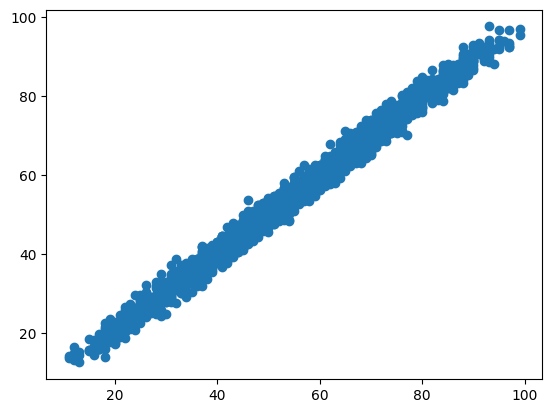

In [ ]:
plt.scatter(y_test, predict)
plt.show()

In [ ]:
r2_score(y_test,predict) #R^2 of test dataset

0.9889704960519785

In [ ]:
model.coef_, model.intercept_ #All coefficients and intercepts. Higher the number, greater the effect.

(array([2.85248393, 1.0169882 , 0.60861668, 0.47694148, 0.19183144]),
 np.float64(-33.92194621555638))

## Try performing simple linear regression on each of these features indvidually

In [ ]:
X_single_feature = data.drop(columns=["Sleep Hours", "Previous Scores", "Extracurricular Activities", "Performance Index","Sample Question Papers Practiced"])
y = data["Performance Index"]
X_single_feature

,Hours Studied
0,7
1,4
2,8
3,5
4,7
...,...
9995,1
9996,7
9997,6
9998,9


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_single_feature, y, test_size = 0.2, random_state = 42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8000, 1) (8000,) (2000, 1) (2000,)


In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
model.score(X_train, y_train)

0.14156806239865583

In [ ]:
predict = np.round(model.predict(X_test), decimals = 1)

In [ ]:
pd.DataFrame({"Actual Performance" : y_test, "Predicted Performance" : predict})

,Actual Performance,Predicted Performance
6252,51.0,55.4
4684,20.0,47.0
1731,46.0,60.9
4742,28.0,58.1
4521,41.0,60.9
...,...,...
6412,45.0,47.0
8285,66.0,52.6
7853,16.0,47.0
1095,65.0,49.8


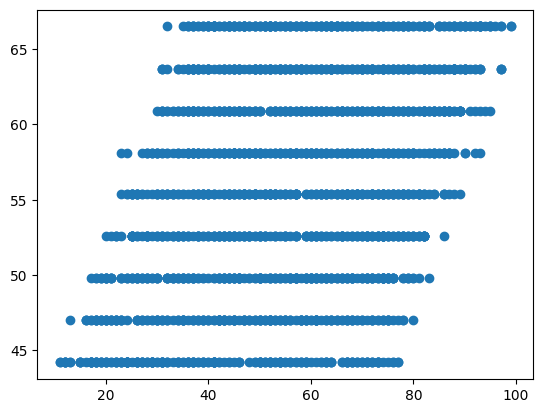

In [ ]:
plt.scatter(y_test, predict)
plt.show()

In [ ]:
r2_score(y_test,predict)

0.1316794277296338

In [ ]:
model.coef_, model.intercept_ #Case for simple linear regression

(array([2.78430044]), np.float64(41.436634826535744))

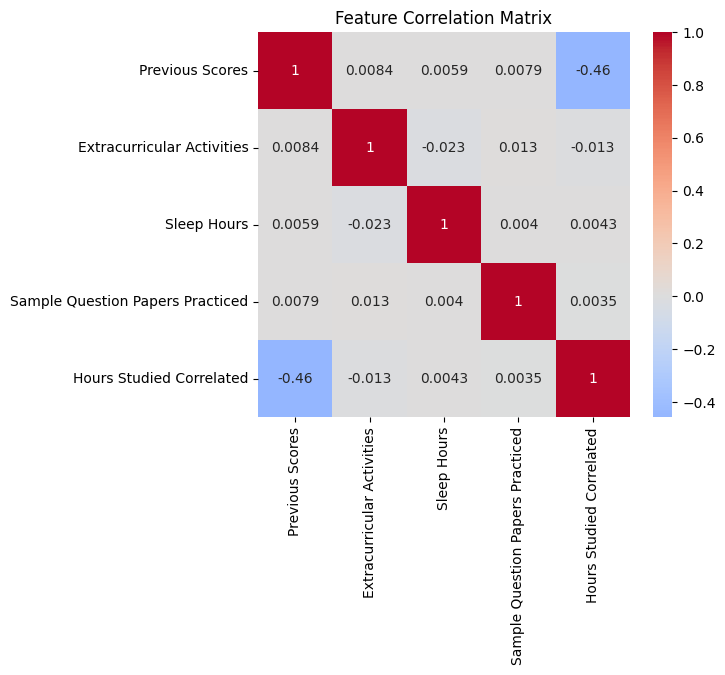

In [ ]:
import seaborn as sns
corr = X.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Feature Correlation Matrix")
plt.show()

Let's try adding some correlation between Hours Studied and Question Papers Practiced

In [ ]:
X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [ ]:
X["Hours Studied Correlated"] = round(X["Hours Studied"] - 0.1*X["Previous Scores"] + 0.1 * np.random.randn(len(X)))
X["Hours Studied Correlated"] = X["Hours Studied Correlated"].clip(lower=0)
X = X.drop(columns=["Hours Studied"])
X

,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Hours Studied Correlated
0,99,1,9,1,0.0
1,82,0,4,2,0.0
2,51,1,7,2,3.0
3,52,1,5,2,-0.0
4,75,0,8,5,-0.0
...,...,...,...,...,...
9995,49,1,4,2,0.0
9996,64,1,8,5,0.0
9997,83,1,8,5,0.0
9998,97,1,7,0,0.0


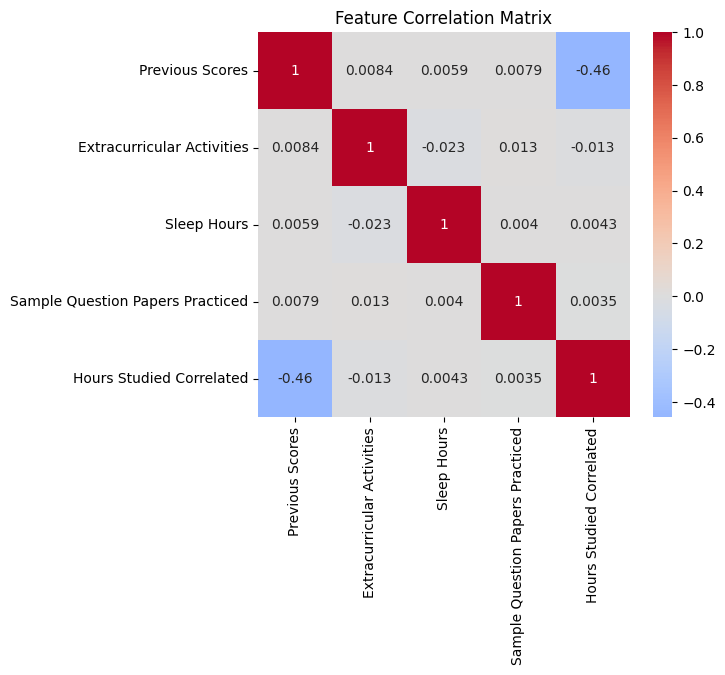

In [ ]:
corr = X.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Feature Correlation Matrix")
plt.show()